<a href="https://colab.research.google.com/github/mustafabozkaya/AI-ML-DL-DS_Projects_Portfolio/blob/master/High_Speed_Bearing_ML_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mathworks/WindTurbineHighSpeedBearingPrognosis-Data

Cloning into 'WindTurbineHighSpeedBearingPrognosis-Data'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from scipy.signal import stft
from scipy.stats import kurtosis, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from glob import glob

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fname = ['data-20130307T015746Z.mat', 'data-20130308T023421Z.mat', 'data-20130309T023343Z.mat',
        'data-20130310T030102Z.mat', 'data-20130311T030024Z.mat', 'data-20130312T061710Z.mat',
        'data-20130313T063404Z.mat', 'data-20130314T065041Z.mat', 'data-20130315T065003Z.mat',
        'data-20130316T065643Z.mat', 'data-20130317T065604Z.mat','data-20130317T184756Z.mat', 
        'data-20130318T184715Z.mat','data-20130320T003354Z.mat', 'data-20130321T003314Z.mat',
        'data-20130322T003950Z.mat', 'data-20130323T003911Z.mat', 'data-20130324T004549Z.mat',
        'data-20130325T004512Z.mat', 'data-20130326T014150Z.mat', 'data-20130327T035827Z.mat',
        'data-20130328T095531Z.mat', 'data-20130329T095505Z.mat', 'data-20130330T100142Z.mat',
        'data-20130331T193818Z.mat', 'data-20130401T193739Z.mat', 'data-20130402T194415Z.mat',
        'data-20130403T212942Z.mat', 'data-20130404T212901Z.mat', 'data-20130405T213537Z.mat',
        'data-20130406T221209Z.mat', 'data-20130407T221131Z.mat', 'data-20130408T221809Z.mat',
        'data-20130409T231445Z.mat', 'data-20130410T231407Z.mat', 'data-20130411T231358Z.mat',
        'data-20130412T170231Z.mat', 'data-20130413T170210Z.mat', 'data-20130414T170847Z.mat',
        'data-20130415T225524Z.mat', 'data-20130416T230159Z.mat', 'data-20130417T230120Z.mat',
        'data-20130418T230803Z.mat', 'data-20130419T230747Z.mat', 'data-20130420T151307Z.mat',
        'data-20130421T151231Z.mat', 'data-20130422T151908Z.mat', 'data-20130423T151830Z.mat',
        'data-20130424T215514Z.mat', 'data-20130425T232202Z.mat']

In [ ]:
df = pd.DataFrame()
vibration = list()
tach = list()

for f in fname:
    read_mat = loadmat('WindTurbineHighSpeedBearingPrognosis-Data/' + f)
    vibration.append(read_mat['vibration'])
    tach.append(read_mat['tach'])

df['vibration'] = vibration
df['tach'] = tach

In [ ]:
fs = int(df.iloc[0,0].shape[0] / 6.0)
t = np.linspace(0.0,6.0,df.iloc[0,0].shape[0])

print('Scan frequency: {:,d} Hz'.format(fs))

Scan frequency: 97,656 Hz


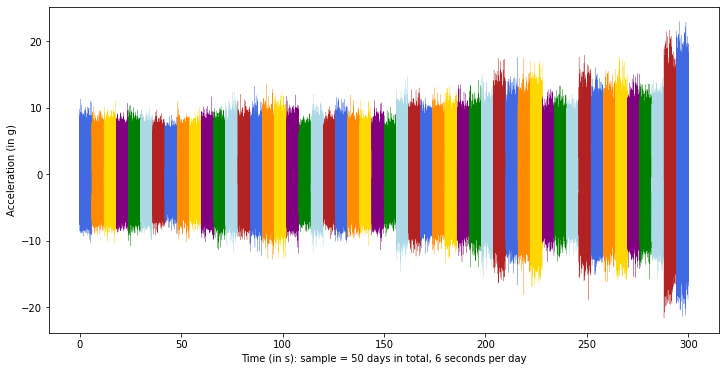

In [ ]:
colors = ['royalblue', 'darkorange', 'gold', 'purple', 'green', 'lightblue', 'firebrick']

plt.subplots(figsize = (12.0,6.0))
for i in range(df.shape[0]):
    c_idx = i % 7
    plt.plot(t + i * 6.0,df.loc[i, 'vibration'], color = colors[c_idx],lw = 0.25)

plt.xlabel('Time (in s): sample = 50 days in total, 6 seconds per day')
plt.ylabel('Acceleration (in g)')    
plt.show()

In [ ]:
f = []
fft = []

wnd = 127

for i in range(df.shape[0]):
    u,v,w = stft(df.loc[i, 'vibration'].squeeze(),fs,nperseg = wnd,noverlap = int(0.8 * wnd),nfft = int(2.0 * wnd))
    f.append(u)
    fft.append(kurtosis(np.abs(w),fisher = False,axis = 1))

f = np.asarray(f)
fft = np.asarray(fft)

fftn = (fft - fft.min()) / (fft.max() - fft.min())

fftn = np.asarray(fftn)
n = np.ones_like(f[0])

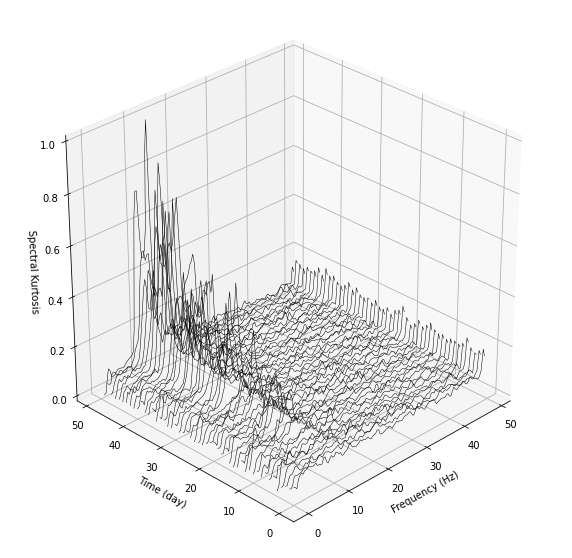

In [ ]:
fig = plt.figure(figsize = (10.0,10.0))
ax = plt.axes(projection = '3d')
ax.view_init(30,225)
for i in range(f.shape[0]):
    ax.plot(f[i] / 1.0e3,i * n,fftn[i],color = 'black',linewidth = 0.50)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Time (day)')
ax.set_zlabel('Spectral Kurtosis')
plt.show()

In [ ]:
for index, val in df.iterrows():

    df.loc[index, 'mean'] = val['vibration'].mean()
    df.loc[index, 'std'] = val['vibration'].std()
    df.loc[index, 'skew'] = skew(val['vibration'])
    df.loc[index, 'kurtosis'] = kurtosis(val['vibration'].squeeze(), fisher=False)
    df.loc[index, 'peak2peak'] = val['vibration'].ptp()
    df.loc[index, 'rms'] = np.sqrt(np.mean(val['vibration']**2))
    df.loc[index, 'crestFactor'] = max(val['vibration'])/df.loc[index, 'rms']
    df.loc[index, 'shapeFactor'] = df.loc[index, 'rms']/np.mean(np.abs(val['vibration']));
    df.loc[index, 'impulseFactor'] = np.max(val['vibration'])/np.mean(np.abs(val['vibration']))
    df.loc[index, 'marginFactor'] = np.max(val['vibration'])/np.mean(np.abs(val['vibration']))**2
    df.loc[index, 'energy'] = np.sum(val['vibration']**2)

    df.loc[index, 'SKMean'] = fftn[index].mean()
    df.loc[index, 'SKStd'] = fftn[index].std()
    df.loc[index, 'SKSkewness'] = skew(fftn[index])
    df.loc[index, 'SKKurtosis'] = kurtosis(fftn[index], fisher=False)

df.drop(['vibration', 'tach'], axis=1, inplace=True)

In [ ]:
df.head(10)

,mean,std,skew,kurtosis,peak2peak,rms,crestFactor,shapeFactor,impulseFactor,marginFactor,energy,SKMean,SKStd,SKSkewness,SKKurtosis
0,0.346052,2.270481,0.003870,2.995612,21.621068,2.296702,4.914735,1.253517,6.160703,3.362451,3.090718e+06,0.089157,0.015658,2.681916,21.290247
1,0.244092,2.062146,0.003010,3.019457,19.309907,2.076542,4.912863,1.254461,6.162997,3.723132,2.526572e+06,0.090517,0.015428,1.486716,16.194677
2,0.218729,2.103553,-0.001029,3.022396,21.474075,2.114894,5.214330,1.253927,6.538388,3.876629,2.620761e+06,0.088484,0.014955,0.891767,10.267416
3,0.213717,2.008063,0.001477,3.041457,19.520002,2.019404,5.286041,1.255580,6.637048,4.126636,2.389443e+06,0.091254,0.019433,1.023893,8.684192
4,0.215185,2.060562,0.001012,3.044474,21.216959,2.071768,5.005767,1.255376,6.284117,3.807824,2.514967e+06,0.093318,0.019583,1.298946,18.395345
5,0.293353,2.079127,-0.008428,3.017996,20.049853,2.099721,4.796572,1.253724,6.013577,3.590652,2.583290e+06,0.089581,0.015811,1.697650,13.314400
6,0.212930,1.971981,-0.001429,3.017409,18.836983,1.983443,4.849649,1.253872,6.080840,3.844121,2.305099e+06,0.089090,0.015056,0.647297,12.516792
7,0.244005,1.811428,0.002216,3.005747,17.861651,1.827789,4.863785,1.253648,6.097472,4.182146,1.957502e+06,0.086924,0.014241,2.007877,16.834101
8,0.209835,1.997331,0.001559,3.071082,21.120432,2.008323,5.432289,1.256789,6.827242,4.272421,2.363292e+06,0.090587,0.018159,0.664050,8.110330
9,0.233177,1.984203,-0.001959,3.007174,18.831975,1.997857,5.048283,1.253975,6.330421,3.973352,2.338725e+06,0.090237,0.015787,0.647790,8.308323


In [ ]:
df_smooth = pd.DataFrame()

for col in df.columns:
    df_smooth[col] = df[col].rolling(5).mean()

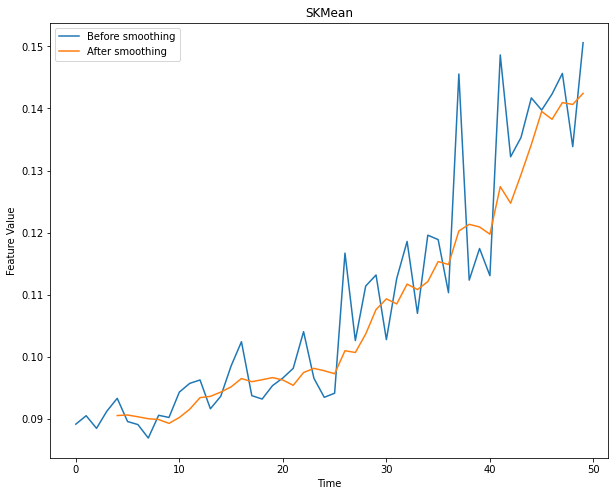

In [ ]:
plt.figure(figsize=(10,8))
x = np.arange(50)
plt.plot(x, df['SKMean'], label='Before smoothing')
plt.plot(x, df_smooth['SKMean'], label='After smoothing')
plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.title('SKMean')
plt.legend(loc='best')

In [ ]:
breakpoint = fname.index("data-20130327T035827Z.mat")
traindata = df_smooth.iloc[:breakpoint, :]

In [ ]:
traindata_selected = traindata.loc[:, ['mean', 'kurtosis', 'shapeFactor', 'marginFactor', 'SKStd']].dropna()
feature_selected = df.loc[:, ['mean', 'kurtosis', 'shapeFactor', 'marginFactor', 'SKStd']].dropna()

In [ ]:
def PCA(A):
    """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

    Returns :  
    coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
    score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
    latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
    """
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)

    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M) # projection of the data in the new space

    return coeff,score,latent

In [ ]:
traindata_selected_values = traindata_selected.iloc[:, :].values
mean_train = traindata_selected_values.mean()
std_train = traindata_selected_values.std()
traindata_normalized = (traindata_selected_values - mean_train) / std_train

In [ ]:
coeff, score, latent = PCA(traindata_normalized)

In [ ]:
feature_selected_check = df_smooth.loc[:, ['mean', 'kurtosis', 'shapeFactor', 'marginFactor', 'SKStd']].dropna()

feature_selected_values = feature_selected_check.iloc[:, :].values
PCA1 = ((feature_selected_values - mean_train) / std_train) @ coeff[:, 1]
PCA2 = ((feature_selected_values - mean_train) / std_train) @ coeff[:, 2]

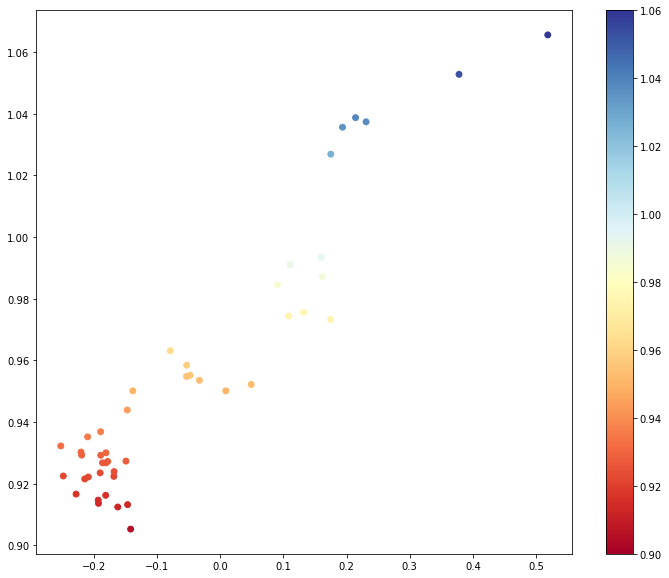

In [ ]:
plt.figure(figsize=(12,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(PCA1, PCA2, c=PCA2, vmin=0.90, vmax=1.06, cmap=cm, s=35)
plt.colorbar(sc)

Text(0.5, 0, 'Time')

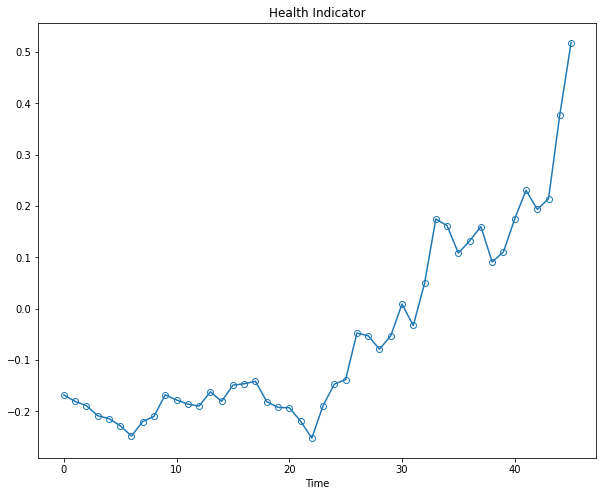

In [ ]:
health_indicator = PCA1

plt.figure(figsize=(10, 8))
plt.plot(range(len(health_indicator)), health_indicator, marker='o', mfc='none')
plt.title("Health Indicator")
plt.xlabel("Time")

## Training a RandomForest Classifier
The Kurtosis is used as input for the classifier (variable X) and the labels associated to the two RUL classes are defined throught the variable y — Medium-life Expectancy Class (y = 0) for the first 35 samples, and Short-life Expectancy Class (y = 1) for the last 15 samples.

In [ ]:
X = fftn
y = np.zeros(X.shape[0],dtype = int)
y[-15:] = 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
def classification_reports(y_true, y_pred):
    print(f"The accuracy is {accuracy_score(y_true, y_pred)}")
    print()
    print("The Classification Report is:")
    print()
    print(classification_report(y_true, y_pred))

In [ ]:
# Classification Report for testing data
y_test_pred = model.predict(X_test)
classification_reports(y_test, y_test_pred)

The accuracy is 0.9

The Classification Report is:

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [ ]:
# Classification Report for training data
y_train_pred = model.predict(X_train)
classification_reports(y_train, y_train_pred)

The accuracy is 1.0

The Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### The model is perfectly fitting as we could see all the metrics(accuracy, precision, recall) are 1.00. Now lets visualize the confusion matrix.

In [ ]:
# utility function to plot confusion matrix

def plotConfusionMatrix(dtrue,dpred,classes, cmap = plt.cm.Blues,bsize = 1.0):
  
    cm = confusion_matrix(dtrue,dpred,normalize = 'true')
    fig,ax = plt.subplots(figsize = (np.shape(classes)[0] * 1.25 * bsize,\
                                     np.shape(classes)[0] * 1.25 * bsize))
    
    im = ax.imshow(cm,interpolation = 'nearest',cmap = cmap)
  
    ax.set(xticks = np.arange(cm.shape[1]),\
           yticks = np.arange(cm.shape[0]),\
           xticklabels = classes,\
           yticklabels = classes,\
           ylabel = 'True Efficiency',\
           xlabel = 'Predicted Efficiency')
  
    plt.setp(ax.get_xticklabels(),rotation = 90,ha = 'right',\
             rotation_mode = 'anchor')

    fmt = '.2f'

    thresh = cm.max() / 2.0
  
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,format(cm[i,j],fmt),ha = 'center',va = 'center',\
                    color = 'white' if cm[i,j] > thresh else 'black')
      
    fig.tight_layout()
  
    return ax


Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

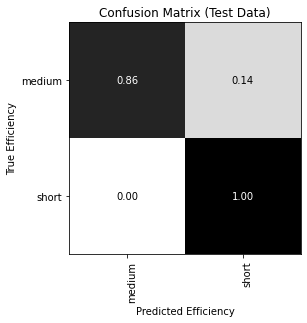

In [ ]:
plotConfusionMatrix(y_test, model.predict(X_test), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Test Data)')

Text(0.5, 1.0, 'Confusion Matrix (Train Data)')

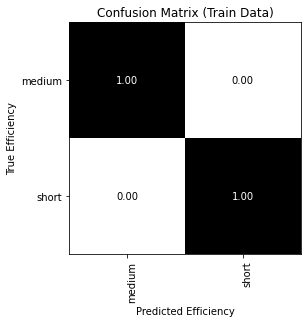

In [ ]:
plotConfusionMatrix(y_train, model.predict(X_train), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Train Data)')

## Plotting the top-k important features recognized by RandomForest Classifier
We consider k=10 in this case.

In [ ]:
top_k = 10
feature_importances = model.feature_importances_
top_k_feature_importances_idx = model.feature_importances_.argsort()[-10:][::-1]
top_k_feature_importances_values = np.array([feature_importances[i] for i in top_k_feature_importances_idx])
labels = np.array(["feature_"+str(i) for i in top_k_feature_importances_idx])

Text(0.5, 1.0, 'Feature Importance by Random Forest')

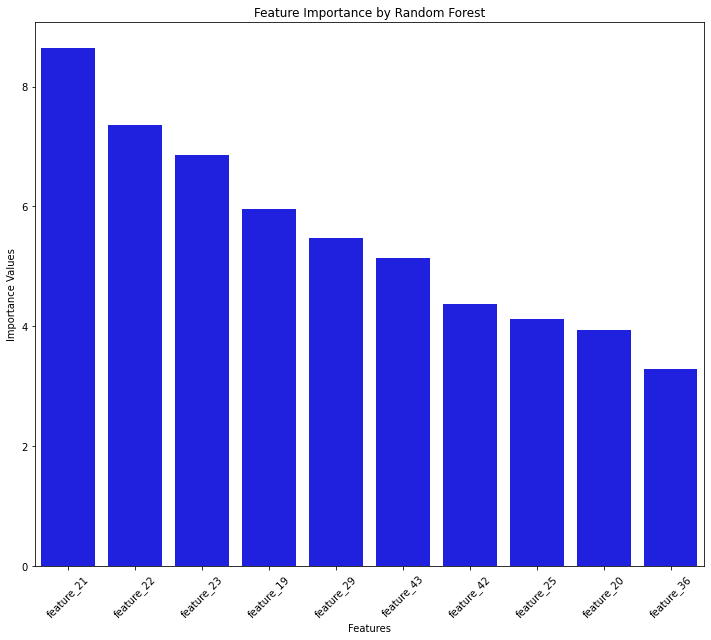

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=labels, y=top_k_feature_importances_values*100, order=labels, color='b')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Values")
plt.title("Feature Importance by Random Forest")

## Training a Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Classification Report for testing data
y_test_pred = model_lr.predict(X_test)
classification_reports(y_test, y_test_pred)

The accuracy is 0.8

The Classification Report is:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [ ]:
# Classification Report for training data
y_train_pred = model_lr.predict(X_train)
classification_reports(y_train, y_train_pred)

The accuracy is 0.9

The Classification Report is:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.67      0.80        12

    accuracy                           0.90        40
   macro avg       0.94      0.83      0.87        40
weighted avg       0.91      0.90      0.89        40



Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

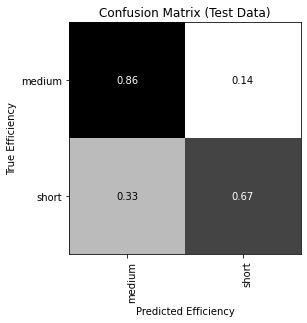

In [ ]:
plotConfusionMatrix(y_test, model_lr.predict(X_test), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Test Data)')

Text(0.5, 1.0, 'Confusion Matrix (Train Data)')

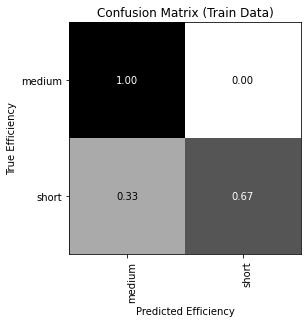

In [ ]:
plotConfusionMatrix(y_train, model_lr.predict(X_train), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Train Data)')

## Training a Decision Tree Classifier

In [ ]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Classification Report for testing data
y_test_pred = model_dtc.predict(X_test)
classification_reports(y_test, y_test_pred)

The accuracy is 0.7

The Classification Report is:

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



In [ ]:
# Classification Report for training data
y_train_pred = model_dtc.predict(X_train)
classification_reports(y_train, y_train_pred)

The accuracy is 1.0

The Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Text(0.5, 1.0, 'Confusion Matrix (Test Data)')

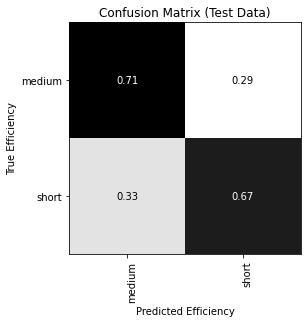

In [ ]:
plotConfusionMatrix(y_test, model_dtc.predict(X_test), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Test Data)')

Text(0.5, 1.0, 'Confusion Matrix (Train Data)')

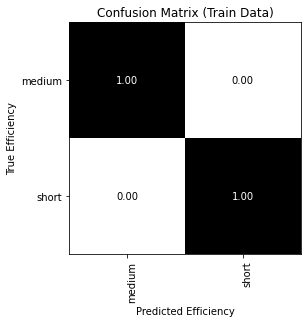

In [ ]:
plotConfusionMatrix(y_train, model_dtc.predict(X_train), ['medium','short'], bsize = 1.75,cmap = 'binary')
plt.title('Confusion Matrix (Train Data)')